# Twitter Opinion Analysis 

<a id='back_to_the_top_cell'></a>

##### -----------------------------------------------------------------------------------------
### Part 1: [Find TopN tag with highest velocity within a time range](#import_first_data_cell)
### Part 2: [Select topN occurance tag which are the new occurances in 2018](#twitter_data)
### Part 3: [Zoom in to plot count - time series data](#preprocessing_section)
### Part 4: [Find the distribution and measure Dispersion](#first_model_train)
####                               ---- [Method 1: Clusters and Distances](#method1)
####                               ---- [Method 2: Three Threshold Z-Score](#method2)
####                               ---- [Method 3: Entrophy](#method3)
### Part 5: [EXAMPLES](#examples)



##### -----------------------------------------------------------------------------------------

<a id='import_first_data_cell'></a>

##### Part 1: Find TopN tag with highest velocity within a time range

In [1]:
import psycopg2

In [2]:
def get_topNTwitter(N):
    
    topNList = set()
    conn = None
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql = "select name as tag, count as count, velocity as velocity, accl as accl, date as date from htvelocity " + "where velocity>0 and date >= '2018-08-01' and date <= '2018-10-05' "+ "ORDER BY velocity desc " + "limit {};".format(2 * N)
    
        cur.execute(sql)
        count = 1
        print("The number of parts: ", cur.rowcount)
        row = cur.fetchone()
        if row is not None:
            topNList.add(row[0])
        while row is not None and count <= N:
            print(row)
            row = cur.fetchone()
            if row is not None:
                topNList.add(row[0])
                count = len(topNList)
             
        cur.close()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return list(topNList)         

In [35]:
topNTag = get_topNTwitter(9)
topNTag

The number of parts:  18
('Trump', 34478, 33928, 33637, datetime.date(2018, 8, 19))
('MAGA', 22751, 22402, 22175, datetime.date(2018, 10, 1))
('Kavanaugh', 19422, 19133, 18976, datetime.date(2018, 10, 1))
('Trump', 19387, 19012, 18777, datetime.date(2018, 10, 1))
('LaborDay', 18489, 18218, 18084, datetime.date(2018, 9, 3))
('Trump', 18820, 18197, 17756, datetime.date(2018, 9, 1))
('Kavanaugh', 42689, 18049, 8653, datetime.date(2018, 10, 5))
('PresidentialAlert', 17606, 17583, 35166, datetime.date(2018, 10, 3))
('MAGA', 17017, 16713, 16521, datetime.date(2018, 9, 1))
('McCainMemorial', 13389, 13373, 13363, datetime.date(2018, 9, 1))
('MAGA', 12100, 11810, 11660, datetime.date(2018, 8, 19))
('MAGA', 33648, 11763, 12629, datetime.date(2018, 10, 3))
('USMCA', 10442, 10375, 10332, datetime.date(2018, 10, 1))
('tbt', 11836, 9718, 7618, datetime.date(2018, 8, 24))
('VoteNo', 9551, 9458, 9403, datetime.date(2018, 10, 4))
('Kavanaugh', 24640, 9396, 11185, datetime.date(2018, 10, 4))


['Trump',
 'MAGA',
 'USMCA',
 'PresidentialAlert',
 'VoteNo',
 'LaborDay',
 'WWG1WGA',
 'McCainMemorial',
 'Kavanaugh',
 'tbt']

In [3]:
def getDataWithTag(tag):
    
    velocityList = list()
    timeList = list()
    
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql = "select * from htvelocity where name = '{}'".format(tag)
        cur.execute(sql)
        print("The number of parts: ", cur.rowcount)
        row = cur.fetchone()
        if row is not None:          
            velocityList.append((row[3]))
            timeList.append(row[5])      
        while row is not None:
            #print(row)
            row = cur.fetchone()
            if row is not None:
                velocityList.append((row[3]))
                timeList.append(row[5])
        cur.close()
        
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return velocityList, timeList   

In [4]:
## plot data
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plotWithOneTag(tag):
    ansList = getDataWithTag(tag)
    
    x = ansList[1]
    y = ansList[0]

    plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\clubsuit$',
                label="{}".format(tag))
    plt.xlabel("Date")
    plt.ylabel("Velocity")
    plt.legend(loc='upper left')
    plt.show()


The number of parts:  312


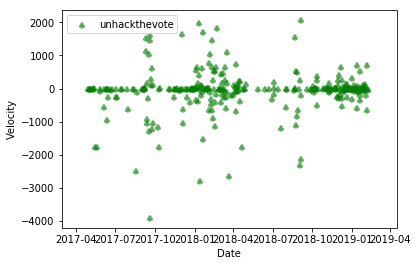

In [19]:
plotWithOneTag("unhackthevote")

In [6]:
def plotWithMultipleTag(topNTag):
    
    plt.figure(figsize=(30,30))
    
    
    i=331
    for t in topNTag:
        
        ansList = getDataWithTag(t)   
        x = ansList[1]
        y = ansList[0]

        plt.subplot(i)
        plt.scatter(x, y, s=80, marker=">", label="{}".format(t))
        plt.legend(loc='upper left')
        i+=1
  
    
#     plt.subplot(332)
#     plt.scatter(x, y, s=80, marker=(5, 0), label="{}".format(tag))

#     verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
#     plt.subplot(333)
#     plt.scatter(x, y, s=80, marker=verts, label="{}".format(tag))
#     plt.legend(loc='upper left')

#     plt.subplot(334)
#     plt.scatter(x, y, s=80,  marker=(5, 1), label="{}".format(tag))
#     plt.legend(loc='upper left')
    
#     plt.subplot(335)
#     plt.scatter(x, y, s=80, marker='+', label="{}".format(tag))
#     plt.legend(loc='upper left')
    
#     plt.subplot(336)
#     plt.scatter(x, y, s=80, marker=(5, 2), label="{}".format(tag))
#     plt.legend(loc='upper left')
    
#     plt.subplot(337)
#     plt.scatter(x, y, s=80,  marker=(5, 1), label="{}".format(tag))
#     plt.legend(loc='upper left')
    
#     plt.subplot(338)
#     plt.scatter(x, y, s=80, marker='+', label="{}".format(tag))
#     plt.legend(loc='upper left')
    
#     plt.subplot(339)
#     plt.scatter(x, y, s=80, marker=(5, 2), label="{}".format(tag))
#     plt.legend(loc='upper left')

    plt.show()


The number of parts:  9
('MAGA', 22751, 22402, 22175, datetime.date(2018, 10, 1))
('Kavanaugh', 19422, 19133, 18976, datetime.date(2018, 10, 1))
('Trump', 19387, 19012, 18777, datetime.date(2018, 10, 1))
('Kavanaugh', 42689, 18049, 8653, datetime.date(2018, 10, 5))
('PresidentialAlert', 17606, 17583, 35166, datetime.date(2018, 10, 3))
('MAGA', 33648, 11763, 12629, datetime.date(2018, 10, 3))
('USMCA', 10442, 10375, 10332, datetime.date(2018, 10, 1))
('VoteNo', 9551, 9458, 9403, datetime.date(2018, 10, 4))
('Kavanaugh', 24640, 9396, 11185, datetime.date(2018, 10, 4))
The number of parts:  63
The number of parts:  1277
The number of parts:  199
The number of parts:  1015
The number of parts:  117
The number of parts:  142


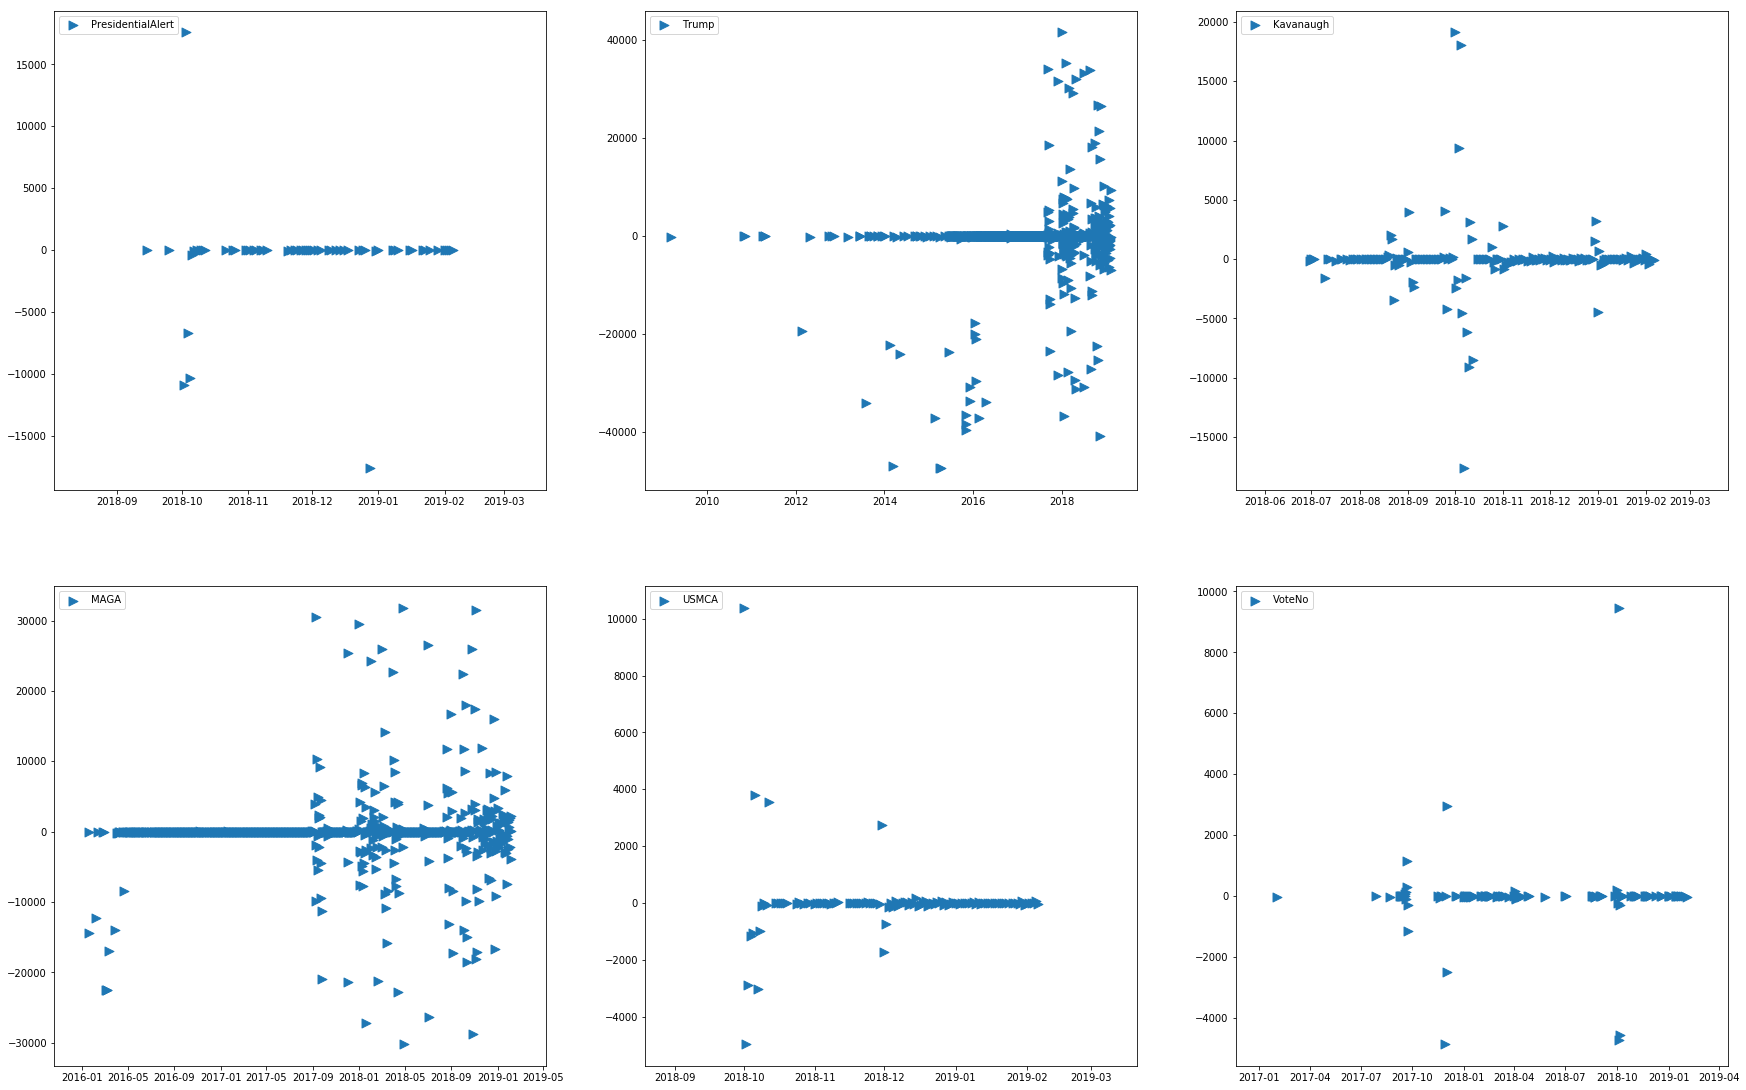

In [13]:
topNTag = get_topNTwitter(9)
plotWithMultipleTag(topNTag)

[back to the top](#back_to_the_top_cell)

<a id='twitter_data'></a>


##### Part 2: Select topN occurance tag which are the new occurances in 2018

In [7]:


def getTopNOccurTags(N):
    
    
    row = list()
    tagList = list()
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")

        
            
   
      
        ## get the filtered list, order by count
        cur2 = conn.cursor()
     
       # sql_query = "select distinct name as tag, count as count, velocity as velocity, accl as accl, date as date from htvelocity " + "where date >= '2018-01-01' and date <= '2018-12-31' and name not in (" + ", ".join("'{0}'".format(w) for w in row) + ") " + "ORDER BY count desc " + "limit {};".format(N)
        sql_one = "select DISTINCT name from htvelocity where date >= '2017-06-01' and date <= '2017-12-31'"
        sql_query = "select name as tag, sum(count) as totalcount from htvelocity " + "where date >= '2018-01-01' and date <= '2018-12-31' and name not in (" + sql_one + ") " + " GROUP BY name " + "ORDER BY totalcount desc " + "limit {}".format(N) 
        
        cur2.execute(sql_query)
        print("The number of parts: ", cur2.rowcount)
            
       ## get topN list
        row = [item for item in cur2.fetchall()]
        tagList = [item[0] for item in row]
     
        cur2.close()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return row,tagList    
              

    

In [45]:
topNOccurrenceList = getTopNOccurTags(100)[0]
topNtagList = getTopNOccurTags(100)[1]
topNOccurrenceList             

The number of parts:  100
The number of parts:  100


[('TrumpShutdown', 543481),
 ('ReleaseTheMemo', 389697),
 ('WWG1WGA', 356235),
 ('Kavanaugh', 278214),
 ('NunesMemo', 147950),
 ('MAGABomber', 113586),
 ('BeBest', 110352),
 ('stablegenius', 110255),
 ('ShitholePresident', 105831),
 ('YoMemoJokes', 95950),
 ('GunReformNow', 93574),
 ('MAGARally', 92307),
 ('MemoDay', 84755),
 ('StormyDaniels', 83956),
 ('Khashoggi', 78629),
 ('VoteRedToSaveAmerica', 77754),
 ('TriggerALiberalIn4Words', 69027),
 ('ReleaseTheDemMemo', 65263),
 ('StableGenius', 59600),
 ('QArmy', 57981),
 ('InternetBillOfRights', 56418),
 ('Individual1', 55023),
 ('Parkland', 54576),
 ('CadetBoneSpurs', 52679),
 ('StopKavanaugh', 48398),
 ('BLEXIT', 48267),
 ('KAG2020', 43962),
 ('FISAMemo', 43345),
 ('TrumpShutDown', 42739),
 ('Shithole', 41445),
 ('TrumpChristmasShutdown', 41021),
 ('BrettKavanaugh', 40595),
 ('SchumerShutdown', 38966),
 ('RedWave', 38748),
 ('PresidentsDay2018', 37792),
 ('USMCA', 37514),
 ('ReleaseTheCures', 36753),
 ('HRCVideo', 36619),
 ('JamalKhash

The number of parts:  183
The number of parts:  187
The number of parts:  300
The number of parts:  199
The number of parts:  81
The number of parts:  98
The number of parts:  175
The number of parts:  189
The number of parts:  211


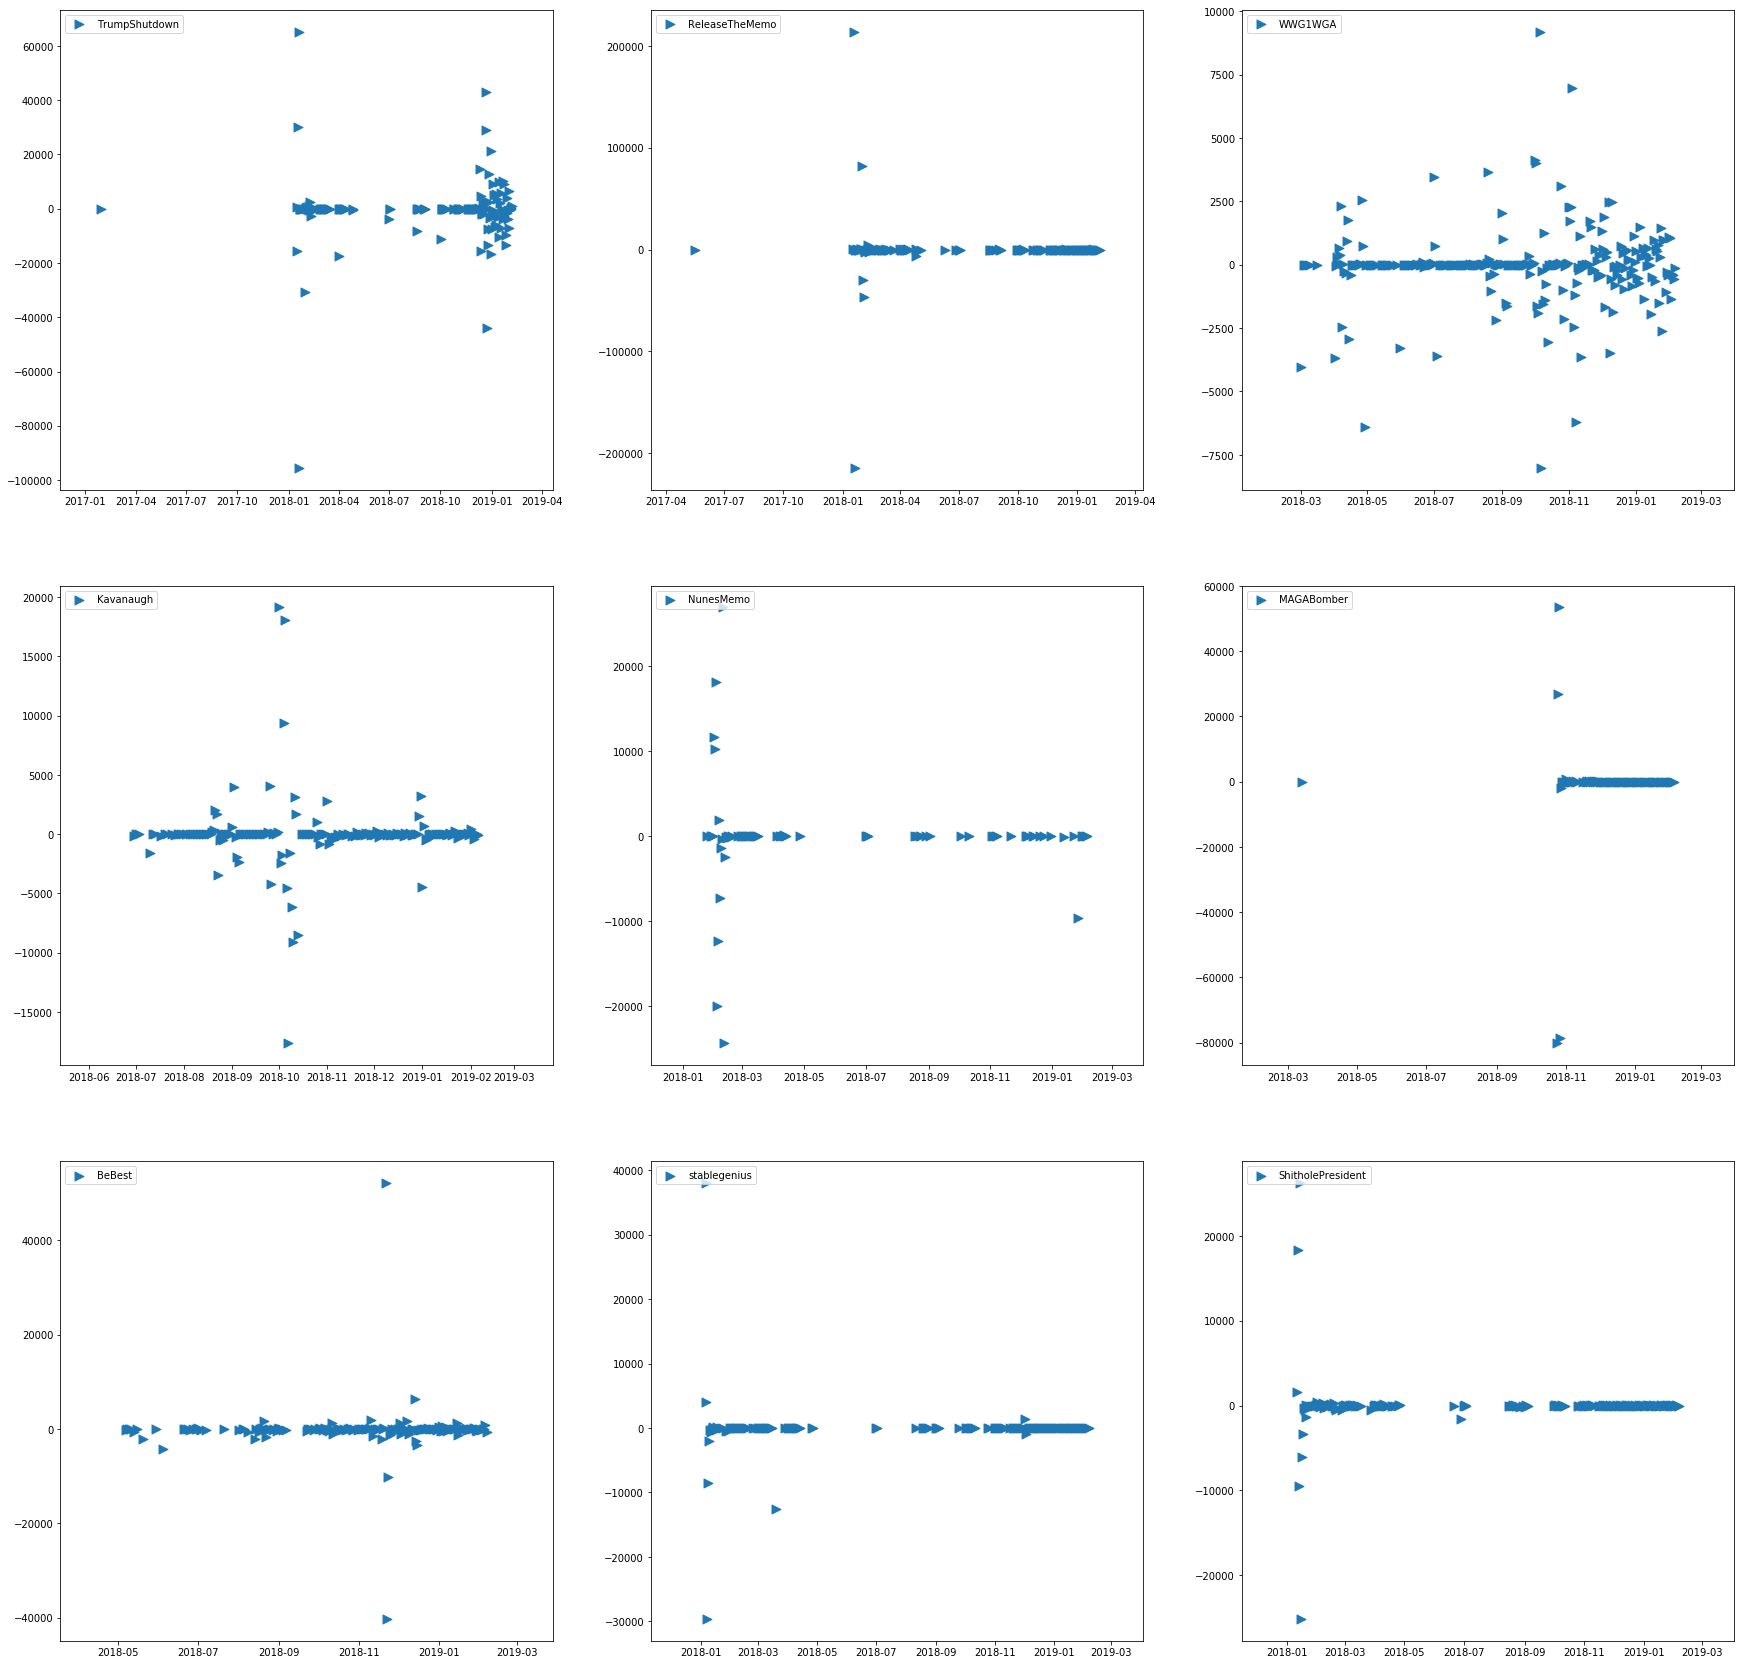

In [46]:
topNOccurTag = topNtagList[:9]
plotWithMultipleTag(topNOccurTag)

[back to the top](#back_to_the_top_cell)

<a id='preprocessing_section'></a>

##### Part 3: Zoom in to plot count - time series data

In [8]:
def getCountDataWithTag(tag):
    
    countList = list()
    timeList = list()
    
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql = "select * from htvelocity where name = '{}'".format(tag)
        cur.execute(sql)
        print("The number of parts: ", cur.rowcount)
        row = cur.fetchone()
        if row is not None:          
            countList.append((row[2]))
            timeList.append(row[5])      
        while row is not None:
            #print(row)
            row = cur.fetchone()
            if row is not None:
                countList.append((row[2]))
                timeList.append(row[5])
        cur.close()
        
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return countList, timeList   
     
    

In [9]:
## plot count - time series data
def plotCountWithMultipleTag(topNTag):
    
    plt.figure(figsize=(30,30))
    
    
    i=331
    for t in topNTag:
        
        ansList = getCountDataWithTag(t)   
        x = ansList[1]
        y = ansList[0]

        plt.subplot(i)
        plt.scatter(x, y, s=80, marker=">", label="{}".format(t))
        plt.legend(loc='upper left')
        i+=1
        
    plt.show()

The number of parts:  1277


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


The number of parts:  1015
The number of parts:  117
The number of parts:  63
The number of parts:  142
The number of parts:  96
The number of parts:  300
The number of parts:  19
The number of parts:  199
The number of parts:  253


ValueError: num must be 1 <= num <= 12, not 0

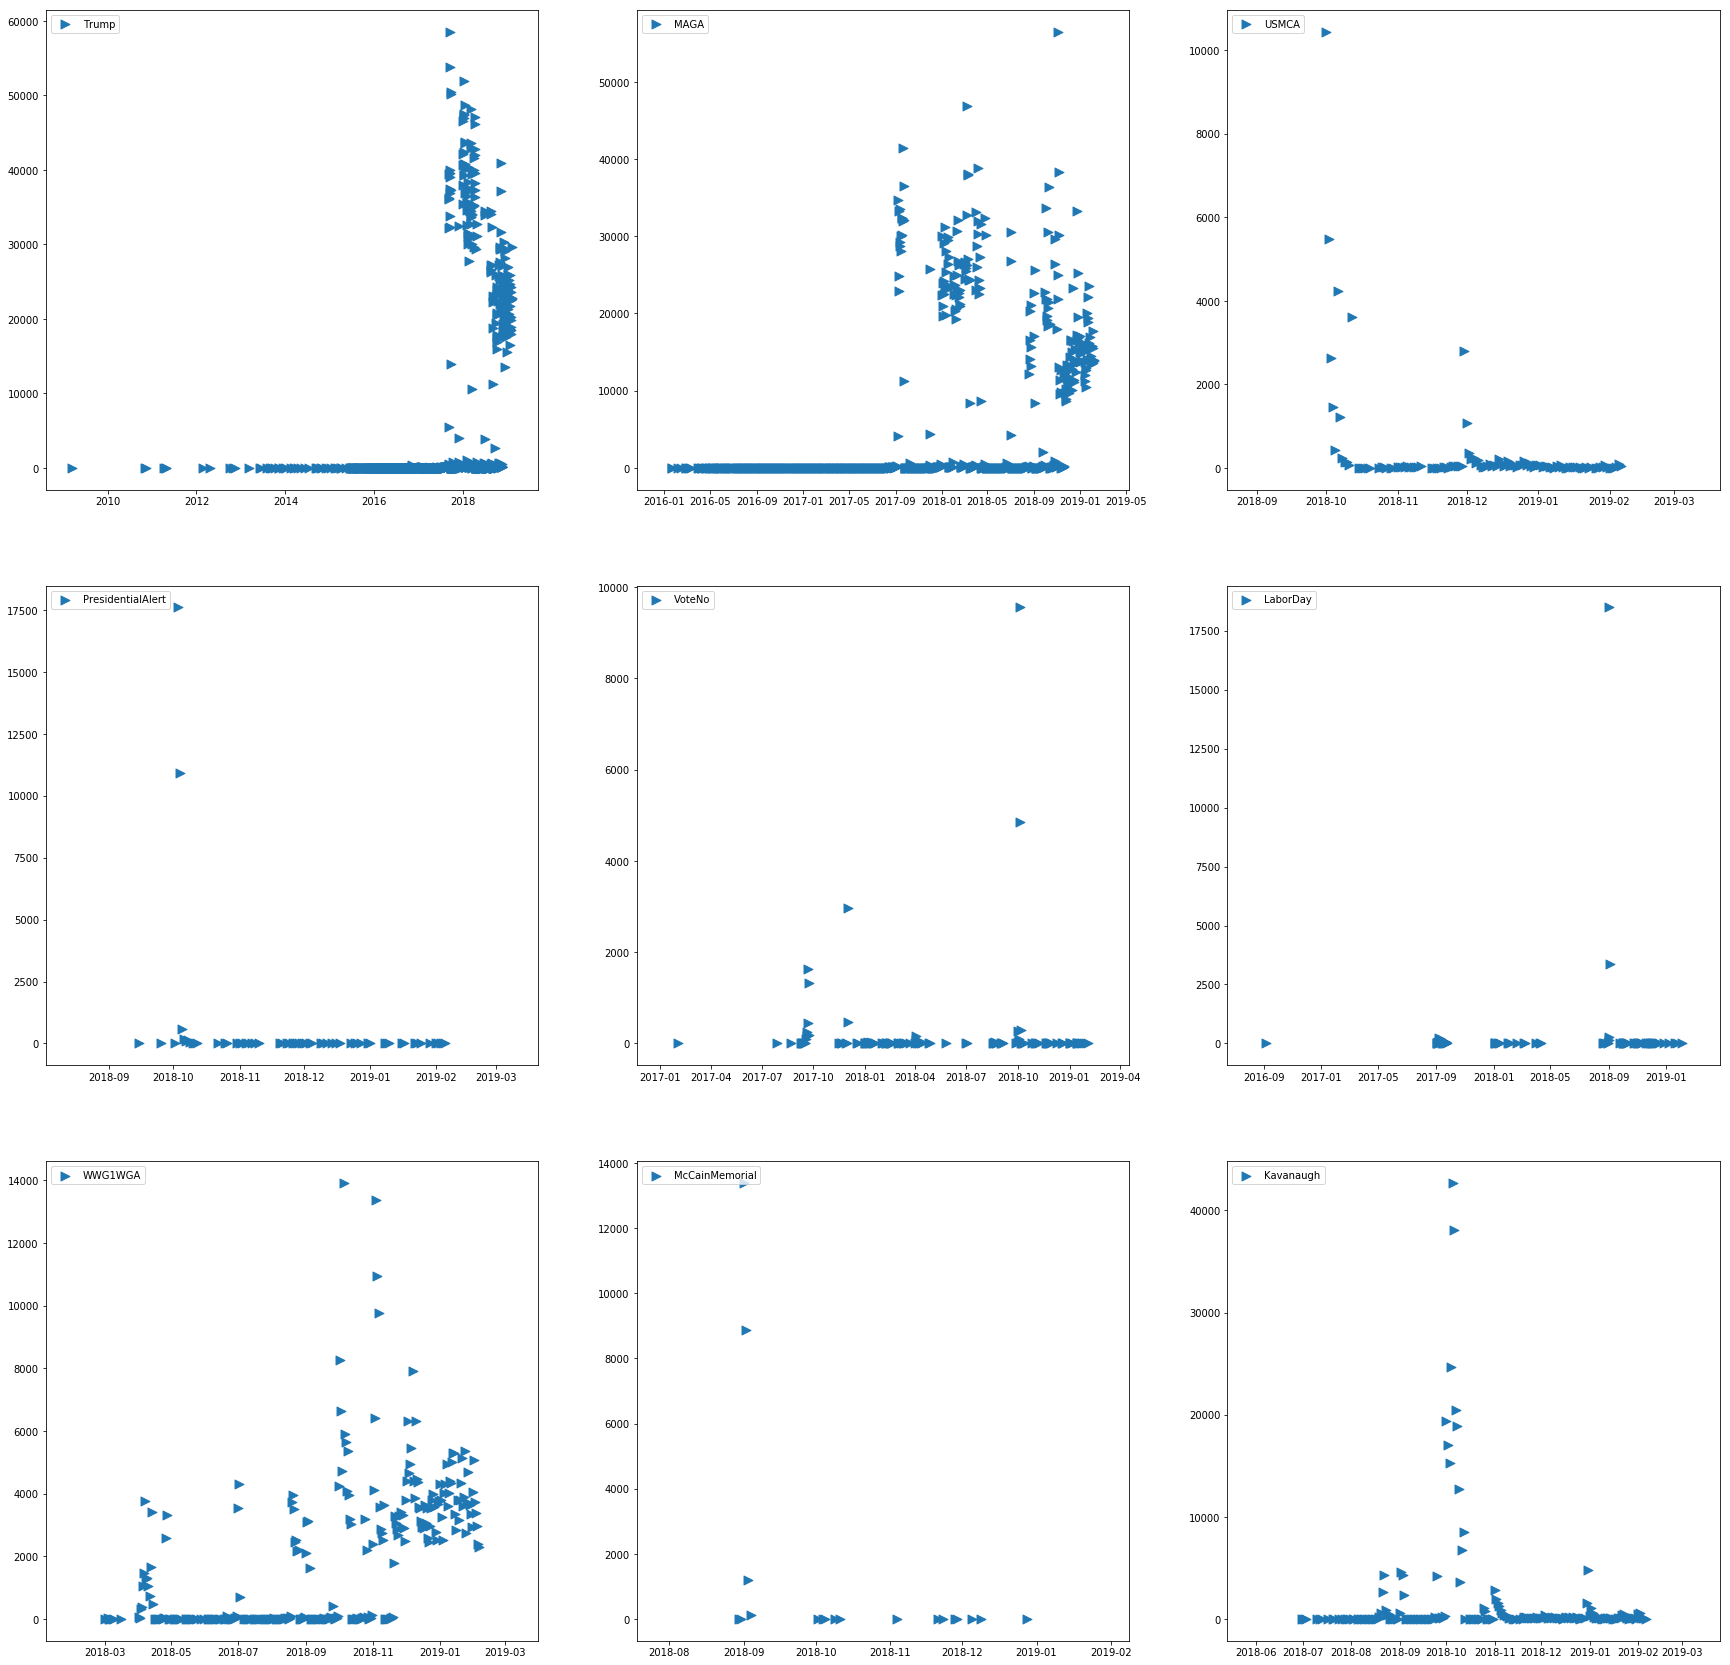

In [43]:
plotCountWithMultipleTag(topNTag)

[back to the top](#back_to_the_top_cell)

<a id='first_model_train'></a>

##### Part 4: Find the distribution and measure Dispersion

In [10]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

[back to the top](#back_to_the_top_cell)

###### Method 1: Clusters and Distances
<a id='method1'></a>

In [11]:
## before clustering, need to transform the inputs
## transformation 1: date to time_delta
import datetime
from dateutil import parser
def dateParser(StringDate):
    dt = parser.parse(StringDate)
    return dt


def calculateDeltaTime(EndDate):
    startDate = dateParser("2000-01-01")
    endDate = dateParser(str(EndDate))
    c =  endDate - startDate
    return c.days * 86400 + c.seconds


In [12]:
## K means Clustering
def doKmeans(data_train, nclust=2):
    
   
        model = KMeans(nclust)
        model.fit(data_train)
        
        clust_labels = model.predict(data_train)
        cent = model.cluster_centers_
        return (clust_labels, cent)
    


In [13]:
## get data_train for clustering (velocity + date)
def getDataTrain(tag):
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity as velocity, date as date from htvelocity where name = '{}'".format(tag)

        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)

        ## get data from the sql output and transform the date
        row = [item for item in cur.fetchall()]
        velocityList = [item[0] for item in row]
           ### transform the date to deltaDate
        dateList = [calculateDeltaTime(item[1]) for item in row]   

        dataRaw = pd.DataFrame(data = {'velocity' : velocityList,'date' : dateList})
        data_train = dataRaw.loc[abs(dataRaw['velocity']) > 100].reset_index()

#data_train = dataRaw
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return data_train        
    
        

In [14]:
def plotKMeansClusteringWithTag(tag):
    
        data_train = getDataTrain(tag)
    
   
        
        clust_labels, cent = doKmeans(data_train, 5)
        kmeans = pd.DataFrame(clust_labels)
        data_train.insert((data_train.shape[1]),'kmeans',kmeans)
        
        #Plot the clusters obtained using k means
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(data_train['date'],data_train['velocity'],
                             c=kmeans[0],s=50)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel('Time Delta')
        ax.set_ylabel('Velocity')
        plt.colorbar(scatter)




In [9]:
data_train = getDataTrain("Trump")
data_train.head(5)

The number of parts:  1277


,index,velocity,date
0,12,106,570585600
1,17,1560,596419200
2,39,428,573436800
3,40,-2169,573523200
4,42,-30843,502848000


The number of parts:  1277


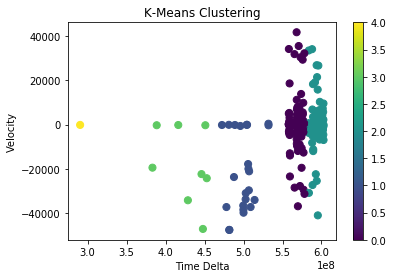

In [10]:
plotKMeansClusteringWithTag("Trump")

In [15]:


def findK(Sum_of_squared_distances):
        
    ## get the not_wanted list first     
    optimalK=1

    for i in range(0,len(Sum_of_squared_distances)-1):
        a = Sum_of_squared_distances[i+1] - Sum_of_squared_distances[i]
        if (abs(a)<0.2):
            break
        else:
            optimalK = optimalK+1    



#     plt.plot(K, Sum_of_squared_distances, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('Sum_of_squared_distances')
#     plt.title('Elbow Method For Optimal k')
#     plt.show()    


    return optimalK     


In [16]:
## Method 1: Clusters and Distances

def drawKfromTag(tag):
    
    df = None
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity as velocity, date as date from htvelocity where name = '{}'".format(tag)
        
        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)
       
        
        ## get data from the sql output and transform the date
        row = [item for item in cur.fetchall()]

        data_train = getDataTrain(tag)
       # print(data_train.head(5))
        
        mms = MinMaxScaler()
        mms.fit(data_train)
        data_transformed = mms.transform(data_train)
        
        Sum_of_squared_distances = []
        K = range(1,15)
        for k in K:
            km = KMeans(n_clusters=k)
            km = km.fit(data_transformed)
            Sum_of_squared_distances.append(km.inertia_)
        plt.plot(K, Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()  
        
        cur.close()
        
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
                 
    

The number of parts:  1015
The number of parts:  1015


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


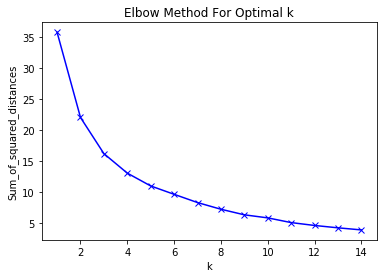

In [24]:
drawKfromTag("MAGA")

In [17]:
def calNClusterScoreWithTag(tag):
    
    df = None
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity from htvelocity where name = '{}'".format(tag)
        
        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)
       
        
        ## get the not_wanted list first
        row = [item[0] for item in cur.fetchall()]
        #data_train = pd.DataFrame(row, columns=['velocity'])
        # change to 2 factors
        
        data_train = getDataTrain(tag)
        
        km = KMeans(n_clusters=2).fit(data_train)
        data_train['cluster'] = km.labels_
        NClusterMeanVelocity = data_train.groupby('cluster').mean()
        data_info = data_train.groupby('cluster').std()['velocity']
        NClusterSum = data_info.sum()


        NClusterScore = (data_info / NClusterSum).std()    
        
        
       
        
        cur.close()
      
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return NClusterScore  
        
        
    

In [26]:
calNClusterScoreWithTag('VoteNo')

The number of parts:  142
The number of parts:  142


0.29763205567333656

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
## define helper functions
def scaleToOne(cluster_centers_):
    initial = cluster_centers_[0]
    ans = []
    if len(cluster_centers_) > 0:
        
        for clu in cluster_centers_:
            clu = clu / initial
            ans.append(clu)
    return ans   

In [20]:
def calNClusterDistanceWithTag(tag):
    
    CulDistScore = 0
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity from htvelocity where name = '{}'".format(tag)
        
        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)
       
        
        ## get the row for velocity
        row = [item[0] for item in cur.fetchall()]
        
              
        data_train = getDataTrain(tag)
 
        
        CulDistScore = getClusterDistScoreFromData(data_train)
              
        print(CulDistScore)
    
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    return CulDistScore

In [21]:
def getClusterDistScoreFromData(data_train):
            ## get K using elbow method
        mms = MinMaxScaler()
        mms.fit(data_train)
        data_transformed = mms.transform(data_train)
        
        Sum_of_squared_distances = []
        
        K = range(1,15)
        for k in K:
            km = KMeans(n_clusters=k)
            km = km.fit(data_transformed)
            Sum_of_squared_distances.append(km.inertia_)

            
        
        optimalK =  findK(Sum_of_squared_distances)
            
       ## Train the data      
        km = KMeans(n_clusters=optimalK).fit(data_train)
        data_train['cluster'] = km.labels_
        
        scaled_cluster_centers = (scaleToOne(km.cluster_centers_))
        print(scaled_cluster_centers)
      
        dists = euclidean_distances(scaled_cluster_centers)
        print(dists)
        
        ## Calculate the distance score
        addUp = 0
        for i in range(0,len(dists)-1):
            for j in range(i+1, len(dists[0])):
                addUp = addUp + dists[i][j]
        return addUp * optimalK      

In [31]:
calNClusterDistanceWithTag("Trump")

The number of parts:  1277
The number of parts:  1277


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([  1.19517985, -48.53553925,   0.80796614]), array([ 0.86601236, -0.0254761 ,  0.93756208]), array([  1.31151708, -37.30259575,   0.70861891]), array([ 1.90017474, -0.33327283,  0.48709851]), array([  1.03690457, -52.73754635,   0.84575059]), array([ 0.97632553, -0.01837553,  0.96518555]), array([  1.28177919, -21.43401706,   0.64731493]), array([  0.57150119, -51.        ,   0.75390849]), array([1.23450357, 0.04029769, 0.89238592]), array([ 0.86888006, -0.06534761,  0.97883467]), array([ 0.8001112 , -0.0271601 ,  0.99032011]), array([1.20470344e+00, 7.11266536e-04, 1.00744437e+00]), array([ 0.9517077 , -0.01034671,  0.95557998])]
[[0.00000000e+00 4.95362960e+01 1.03607548e+00 3.83049708e+01
  1.68849013e+00 5.37377804e+01 1.01924543e+00 2.24385585e+01
  5.20023478e+01 9.93781280e-01 1.07359487e+00 1.04647365e+00
  1.02006710e+00 1.01247506e+00]
 [4.95362960e+01 0.00000000e+00 4.85113530e+01 1.12339852e+01
  4.82084895e+01 4.20515665e+00 4.85179121e+01 2.710

29061.104191105504

[back to the top](#back_to_the_top_cell)
<a id='method2'></a>

##### Method 2: Three Threshholds z-score algorithm

In [22]:


#!/usr/bin/env python
# Implementation of algorithm from https://stackoverflow.com/a/22640362/6029703
import numpy as np
import pylab
import collections, numpy

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

    

In [23]:
# Data
# y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
#        1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
#        2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])



def plotZscore(y):
    



# y = data_train['velocity']

    # Settings: lag = 30, threshold = 5, influence = 1
    lag = 10
    threshold =5
    influence = 0.8

    # Run algo with settings from above
    result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

    # Plot result
    pylab.subplot(211)
    pylab.plot(np.arange(1, len(y)+1), y)

    pylab.plot(np.arange(1, len(y)+1),
               result["avgFilter"], color="cyan", lw=2)

    pylab.plot(np.arange(1, len(y)+1),
               result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

    pylab.plot(np.arange(1, len(y)+1),
               result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

    pylab.subplot(212)
    pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
    pylab.ylim(-1.5, 1.5)

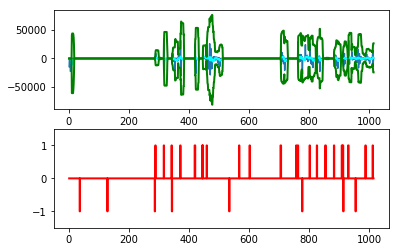

In [24]:
## example usage with local data
import pandas as pd

data = pd.read_csv('data.csv')
data_train = data.iloc[:,[0]]
data_train = data_train.dropna()


plotZscore(data_train['velocity'])

In [25]:

def getZScoreWithTag(tag):
    
    zScore = 0
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity from htvelocity where name = '{}'".format(tag)
        
        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)
       
        
        ## get the not_wanted list first
        row = [item[0] for item in cur.fetchall()]
        #data_train = pd.DataFrame(row, columns=['velocity'])
        data_train = getDataTrain(tag)
        y = data_train['velocity']

        
        
        ## using the threshold z-score model to calculate dispersion
        # Settings: lag = 30, threshold = 5, influence = 1
        lag = 10
        threshold =5
        influence = 0.8

        # Run algo with settings from above
        result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
        
        a = result["signals"]

        
        
        for key, value in collections.Counter(a).items():
            if key==1.0 or key==-1.0:
                zScore = zScore + value
        
        # zScore = zScore / sum(collections.Counter(a).values())
                
                
        cur.close()
      
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()        
                
    return zScore        
     
    

In [51]:
getZScoreWithTag("MAGA")

The number of parts:  1015


72

[back to the top](#back_to_the_top_cell)
<a id='method3'></a>
###### method 3: Entrophy method

In [26]:

import pandas as pd
import scipy as sc

# Input a pandas series 
def entScore(tag):
    
    entropyScore=0
    
    try:
        conn = psycopg2.connect(host="10.128.6.136",database="postgres", user="b5huang", 
                        password="pht8mCcW")
        cur = conn.cursor()
        sql_one = "select velocity from htvelocity where name = '{}'".format(tag)
        
        cur.execute(sql_one)
        print("The number of parts: ", cur.rowcount)
       
        
        ## get the not_wanted list first
        row = [item[0] for item in cur.fetchall()]
        data_train = getDataTrain(tag)
        data = data_train['velocity']
        
        
        p_data= data.value_counts()/len(data) # calculates the probabilities
        entropyScore=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
       
                
                
        cur.close()
      
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
    
   
    return entropyScore




In [27]:
## entrophy example
entScore("MAGA")

The number of parts:  1015
The number of parts:  1015


5.486938225516726

[back to the top](#back_to_the_top_cell)
<a id='examples'></a>

### examples ---- Comparison of Method 1, 2, 3

In [28]:

## getTopNtag and calculate z-score, entropy and clustDistScore
topNTag = get_topNTwitter(20)
zScoreTable = pd.DataFrame(topNTag, columns=['tag'])
zScoreTable['zScore'] = None
zScoreTable['entScore'] = None
zScoreTable['cluDistScore'] = None
for index, row in zScoreTable.iterrows():
    tag = row['tag']
    zScore = getZScoreWithTag(tag)
    entScoreValue = entScore(tag)
    cluDistScore = calNClusterDistanceWithTag(tag)
    zScoreTable.set_value(index,'zScore',zScore)
    zScoreTable.set_value(index,'entScore',entScoreValue)
    zScoreTable.set_value(index,'cluDistScore',cluDistScore)


The number of parts:  40
('Trump', 34478, 33928, 33637, datetime.date(2018, 8, 19))
('MAGA', 22751, 22402, 22175, datetime.date(2018, 10, 1))
('Kavanaugh', 19422, 19133, 18976, datetime.date(2018, 10, 1))
('Trump', 19387, 19012, 18777, datetime.date(2018, 10, 1))
('LaborDay', 18489, 18218, 18084, datetime.date(2018, 9, 3))
('Trump', 18820, 18197, 17756, datetime.date(2018, 9, 1))
('Kavanaugh', 42689, 18049, 8653, datetime.date(2018, 10, 5))
('PresidentialAlert', 17606, 17583, 35166, datetime.date(2018, 10, 3))
('MAGA', 17017, 16713, 16521, datetime.date(2018, 9, 1))
('McCainMemorial', 13389, 13373, 13363, datetime.date(2018, 9, 1))
('MAGA', 12100, 11810, 11660, datetime.date(2018, 8, 19))
('MAGA', 33648, 11763, 12629, datetime.date(2018, 10, 3))
('USMCA', 10442, 10375, 10332, datetime.date(2018, 10, 1))
('tbt', 11836, 9718, 7618, datetime.date(2018, 8, 24))
('VoteNo', 9551, 9458, 9403, datetime.date(2018, 10, 4))
('Kavanaugh', 24640, 9396, 11185, datetime.date(2018, 10, 4))
('WWG1WGA',

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([0.92911877, 0.62678063, 1.00868613]), array([ 0.88122605, -0.27065527,  1.01094891]), array([ 0.86685824, 12.02635328,  1.00076642]), array([ 1.72413793, -1.71652422,  1.00934307])]
[[ 0.          0.37998987  1.27624134 11.02715711  2.81139945]
 [ 0.37998987  0.          0.89871576 11.39974542  2.47449661]
 [ 1.27624134  0.89871576  0.         12.29702116  1.67363079]
 [11.02715711 11.39974542 12.29702116  0.         13.76959273]
 [ 2.81139945  2.47449661  1.67363079 13.76959273  0.        ]]
290.039951122531
The number of parts:  201
The number of parts:  201
The number of parts:  201


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  201
The number of parts:  201
The number of parts:  201


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


n_samples=11 should be >= n_clusters=12
The number of parts:  253
The number of parts:  253
The number of parts:  253
The number of parts:  253


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  253
The number of parts:  253


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 0.55271565, -2.35616438,  0.78336383]), array([ 0.81445072, -0.05584826,  1.04476271]), array([ 0.82108626, -1.84931507,  0.92253327]), array([0.82712105, 3.45966514, 1.02872944])]
[[0.         3.39276199 1.07296215 2.85597752 2.46590047]
 [3.39276199 0.         2.32986886 0.59015858 5.82746735]
 [1.07296215 2.32986886 0.         1.79763936 3.5155728 ]
 [2.85597752 0.59015858 1.79763936 0.         5.31004566]
 [2.46590047 5.82746735 3.5155728  5.31004566 0.        ]]
145.7917736454215
The number of parts:  405
The number of parts:  405
The number of parts:  405


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  405
The number of parts:  405
The number of parts:  405


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([0.87241379, 1.24056272, 0.94186931]), array([ 1.22137931, 10.18112544,  0.90114475]), array([ 0.99632184, -0.11749381,  0.96320412]), array([1.14355045, 8.04116191, 0.91975811]), array([0.63386973, 5.50214928, 0.87524455]), array([ 0.8016092 , 16.16858148,  0.99037486]), array([1.43415435, 6.28202981, 0.95280822]), array([ 1.72249042, -0.83606878,  1.00672291]), array([ 0.67320562, -0.66484304,  0.97085488]), array([1.49809524, 0.93032993, 0.95826728]), array([0.66896552, 1.08792497, 1.01155997])]
[[ 0.          0.27843821  9.18432608  1.11810549  7.04308218  4.51873471
  15.16988186  5.30005245  1.97311585  1.69686368  0.50467257  0.34270725]
 [ 0.27843821  0.          8.94746317  1.36386433  6.80603801  4.26877759
  14.92826548  5.07267804  2.24482397  1.91601022  0.6985632   0.26371627]
 [ 9.18432608  8.94746317  0.         10.30126501  2.14145924  4.71578798
   6.0028159   3.90523867 11.02909006 10.86003619  9.25510952  9.11063375]
 [ 1.11810549  1.3638

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  63
The number of parts:  63


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


n_samples=6 should be >= n_clusters=7
The number of parts:  435
The number of parts:  435
The number of parts:  435
The number of parts:  435
The number of parts:  435
The number of parts:  435


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 1.23856827, 92.51465347,  0.94452164]), array([  1.39674241, 274.9980198 ,   0.7453509 ]), array([ 0.94811985, -0.99146992,  1.03699187]), array([1.40044239, 6.05742574, 0.97392718]), array([ 1.08554767, 20.32588402,  1.02266109]), array([ 1.41832563, 16.57821782,  0.92196437]), array([1.11517394, 1.02566337, 0.98963617]), array([1.58328306, 0.56930693, 1.04603934])]
[[0.00000000e+00 9.15149812e+01 2.73998425e+02 1.99248899e+00
  5.07332130e+00 1.93260866e+01 1.55840289e+01 1.18452749e-01
  7.26522726e-01]
 [9.15149812e+01 0.00000000e+00 1.82483544e+02 9.35066202e+01
  8.64573843e+01 7.21889739e+01 7.59366518e+01 9.14890844e+01
  9.19460488e+01]
 [2.73998425e+02 1.82483544e+02 0.00000000e+00 2.75990008e+02
  2.68940691e+02 2.54672477e+02 2.58419863e+02 2.73972610e+02
  2.74428941e+02]
 [1.99248899e+00 9.35066202e+01 2.75990008e+02 0.00000000e+00
  7.06367488e+00 2.13178017e+01 1.75763549e+01 2.02459288e+00
  1.68509303e+00]
 [5.07332130e+00 8.64573843e+01 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  199
The number of parts:  199


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([1.31690791, 0.09475645, 0.98866819]), array([2.90800299, 0.24822237, 0.982416  ]), array([ 2.84816754, -0.14479638,  0.99288119]), array([ 2.5104712 , -0.45022624,  1.00512266]), array([ 2.01745201, 11.70437406,  0.97604618]), array([ 1.20867614, -0.0155139 ,  1.0015873 ]), array([2.39162304, 0.17375566, 0.99604618]), array([ 2.38743455, -0.02171946,  0.98412698])]
[[ 0.          0.95917929  2.05084232  2.17401304  2.09396888 10.75264648
   1.03673368  1.61842826  1.72311847]
 [ 0.95917929  0.          1.59849129  1.54989011  1.31220052 11.63074126
   0.15505022  1.07763997  1.076854  ]
 [ 2.05084232  1.59849129  0.          0.39768522  0.8039761  11.49071509
   1.71977792  0.52189973  0.58639834]
 [ 2.17401304  1.54989011  0.39768522  0.          0.45549541 11.87826636
   1.64460384  0.55670306  0.47696902]
 [ 2.09396888  1.31220052  0.8039761   0.45549541  0.         12.16462995
   1.3724641   0.63526426  0.4463148 ]
 [10.75264648 11.63074126 11.49071509 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  449
The number of parts:  449
The number of parts:  449
The number of parts:  449


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([  0.71780266, 139.47368421,   1.04877803]), array([  0.70509107, -25.96491228,   1.03584026]), array([ 1.07466968, -2.48120301,  1.04033042]), array([  0.47113342, -32.36842105,   1.02154195]), array([ 1.03494883, -5.21303258,  1.0090199 ]), array([0.88651284, 1.05263158, 0.99537982]), array([  1.16595125, -19.75708502,   1.02992034]), array([   0.81079947, -199.67963387,    1.05266029]), array([ 6.13052713e-01, -8.15526316e+02,  9.88586546e-01]), array([ 1.4624672 , -6.99690402,  1.00408163]), array([  1.04935613, 139.31174089,   1.04479912])]
[[0.00000000e+00 1.38473980e+02 2.69665487e+01 3.48223728e+00
  3.33726188e+01 6.21313742e+00 1.25182925e-01 2.07577700e+01
  2.00679730e+02 8.16526408e+02 8.01026632e+00 1.38311757e+02]
 [1.38473980e+02 0.00000000e+00 1.65438597e+02 1.41955336e+02
  1.71842284e+02 1.44687070e+02 1.38421166e+02 1.59231401e+02
  3.39153331e+02 9.55000008e+02 1.46472488e+02 3.69011069e-01]
 [2.69665487e+01 1.65438597e+02 0.00000000e+00

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  45


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


n_samples=12 should be >= n_clusters=13
The number of parts:  96
The number of parts:  96
The number of parts:  96
The number of parts:  96
The number of parts:  96


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  96


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


n_samples=12 should be >= n_clusters=13
The number of parts:  300
The number of parts:  300
The number of parts:  300
The number of parts:  300


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  300
The number of parts:  300


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 1.16655367, 14.10918433,  0.96091152]), array([1.34327684, 0.25895954, 0.9862325 ]), array([ 0.93189522, -6.14888772,  0.99429702]), array([1.25423729, 0.88477842, 0.98052352]), array([1.31489741, 1.42946963, 1.00271656]), array([ 1.13672316, -6.40205523,  0.97249258]), array([1.00254237, 1.238921  , 0.99742736]), array([0.64813559, 0.21991008, 0.99051183]), array([  1.66101695, 124.51637765,   0.95478996]), array([  0.63050847, 101.4566474 ,   0.96788702])]
[[  0.          13.1103006    0.81680444   7.14921439   0.27980698
    0.53255227   7.40336893   0.23894838   0.85582642 123.51815468
  100.45733205]
 [ 13.1103006    0.          13.85137535  20.25945859  13.22471114
   12.68065134  20.51126452  12.87136012  13.89897739 110.40830072
   87.34910817]
 [  0.81680444  13.85137535   0.           6.42104402   0.63214706
    1.17097011   6.66423071   1.03756916   0.69625033 124.25782834
  101.20019962]
 [  7.14921439  20.25945859   6.42104402   0.           7

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  174
The number of parts:  174


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 0.95660377, -0.49596774,  1.03153552]), array([1.24981132, 5.19919355, 1.02053023]), array([ 0.96226415, -3.06048387,  0.99036397]), array([1.25498652, 0.87788018, 1.04372945]), array([0.79811321, 0.71370968, 1.02765989]), array([ 1.02641509, -0.12365591,  1.03614759])]
[[0.         1.49692926 4.20666776 4.06067065 0.28608328 0.35140503
  1.12454747]
 [1.49692926 0.         5.70271461 2.56485284 1.40592997 1.22002202
  0.37882844]
 [4.20666776 5.70271461 0.         8.2647362  4.32137874 4.50817564
  5.32755818]
 [4.06067065 2.56485284 8.2647362  0.         3.94958804 3.77794567
  2.93788528]
 [0.28608328 1.40592997 4.32137874 3.94958804 0.         0.48574007
  1.0273154 ]
 [0.35140503 1.22002202 4.50817564 3.77794567 0.48574007 0.
  0.86797173]
 [1.12454747 0.37882844 5.32755818 2.93788528 1.0273154  0.86797173
  0.        ]]
407.8686239669692
The number of parts:  244
The number of parts:  244
The number of parts:  244
The number of parts:  244


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  244
The number of parts:  244


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([  2.00014283, -18.75211745,   0.96673492]), array([  1.41398272, -39.91304348,   0.90487776]), array([2.25137471, 0.43478261, 0.98191015]), array([1.17890809, 1.29270186, 1.00568469]), array([  1.68263943, -26.04968944,   0.92583404]), array([ 2.35428123, -2.66459627,  0.9585451 ])]
[[ 0.         19.77745019 40.91524846  1.37322125  0.34309591 27.05840343
   3.90705285]
 [19.77745019  0.         21.1691332  19.18855079 20.06167303  7.30459022
  16.09142065]
 [40.91524846 21.1691332   0.         40.35658842 41.20653918 13.86597277
  37.2603524 ]
 [ 1.37322125 19.18855079 40.35658842  0.          1.3735994  26.49063729
   3.1011748 ]
 [ 0.34309591 20.06167303 41.20653918  1.3735994   0.         27.34714763
   4.12842981]
 [27.05840343  7.30459022 13.86597277 26.49063729 27.34714763  0.
  23.39475914]
 [ 3.90705285 16.09142065 37.2603524   3.1011748   4.12842981 23.39475914
   0.        ]]
2770.005285727078
The number of parts:  19
The number of parts:  19
lis

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  19
n_samples=8 should be >= n_clusters=9
The number of parts:  14


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  14
list assignment index out of range
The number of parts:  14
The number of parts:  14
The number of parts:  14
The number of parts:  14


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


n_samples=7 should be >= n_clusters=8
The number of parts:  186
The number of parts:  186
list assignment index out of range
The number of parts:  186
The number of parts:  186
The number of parts:  186
The number of parts:  186
n_samples=7 should be >= n_clusters=8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  142
The number of parts:  142
The number of parts:  142
The number of parts:  142
The number of parts:  142
The number of parts:  142


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 1.58181818, 73.18333333,  0.95493129]), array([ 1.06363636, -1.625     ,  0.97285662]), array([0.46060606, 4.48333333, 0.94491062]), array([0.82727273, 0.7       , 0.99941627]), array([  1.32727273, -11.075     ,   0.94447282])]
[[ 0.         72.18569217  2.62591153  3.52527896  0.346172   12.0795619 ]
 [72.18569217  0.         74.81013013 68.70914944 72.48727425 84.25871847]
 [ 2.62591153 74.81013013  0.          6.13809112  2.33713461  9.45371936]
 [ 3.52527896 68.70914944  6.13809112  0.          3.80145057 15.58245319]
 [ 0.346172   72.48727425  2.33713461  3.80145057  0.         11.785739  ]
 [12.0795619  84.25871847  9.45371936 15.58245319 11.785739    0.        ]]
2640.758860289682
The number of parts:  1277
The number of parts:  1277


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  1277
The number of parts:  1277
The number of parts:  1277
The number of parts:  1277


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([  1.03690457, -52.73754635,   0.84575059]), array([ 0.9517077 , -0.01034671,  0.95557998]), array([  1.31151708, -37.30259575,   0.70861891]), array([ 1.90017474, -0.33327283,  0.48709851]), array([  1.19517985, -48.53553925,   0.80796614]), array([ 0.86601236, -0.0254761 ,  0.93756208]), array([  1.28177919, -21.43401706,   0.64731493]), array([ 0.86888006, -0.06534761,  0.97883467]), array([  0.57150119, -51.        ,   0.75390849]), array([1.23450357, 0.04029769, 0.89238592]), array([ 0.97632553, -0.01837553,  0.96518555]), array([1.20470344e+00, 7.11266536e-04, 1.00744437e+00]), array([ 0.8001112 , -0.0271601 ,  0.99032011])]
[[0.00000000e+00 5.37377804e+01 1.01247506e+00 3.83049708e+01
  1.68849013e+00 4.95362960e+01 1.03607548e+00 2.24385585e+01
  1.07359487e+00 5.20023478e+01 9.93781280e-01 1.01924543e+00
  1.02006710e+00 1.04647365e+00]
 [5.37377804e+01 0.00000000e+00 5.27273829e+01 1.54380024e+01
  5.24126106e+01 4.20515665e+00 5.27124272e+01 3.130

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  1015
The number of parts:  1015
The number of parts:  1015
The number of parts:  1015


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([  0.85658349, -26.46875   ,   1.06420329]), array([  1.05703089, 774.91872428,   0.91609568]), array([1.4071364 , 0.24125514, 1.02631669]), array([ 1.16319987, -0.27962963,  1.07523275]), array([0.59664556, 1.55555556, 1.04384112]), array([1.18320316, 0.34027778, 1.02240482]), array([0.90896983, 0.87716049, 1.05289784]), array([0.71677629, 0.99814815, 1.03167791]), array([0.98331004, 0.52160494, 1.01756736]), array([ 0.94650362, -6.67211329,  1.06972396]), array([0.97844475, 0.37745098, 1.05890535]), array([0.61335608, 1.18287037, 1.01146257]), array([6.53498315e-01, 8.62652778e+02, 9.07526660e-01])]
[[0.00000000e+00 2.74691994e+01 7.73918731e+02 8.61479176e-01
  1.29218658e+00 6.87938093e-01 6.85053854e-01 1.61784481e-01
  2.84995772e-01 4.79008353e-01 7.67261661e+00 6.25701008e-01
  4.27862693e-01 8.61652852e+02]
 [2.74691994e+01 0.00000000e+00 8.01387513e+02 2.67157055e+01
  2.61909175e+01 2.80255184e+01 2.68110499e+01 2.73459630e+01
  2.74672732e+01 2.6

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  300
The number of parts:  300
The number of parts:  300


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 0.78441924, -0.71236301,  1.04198586]), array([ 0.76914661, 17.81090175,  0.96579501]), array([0.77805564, 3.40363392, 1.02837189]), array([0.78003543, 2.89816061, 0.98730738]), array([ 0.73690439, -0.75254759,  1.04935292]), array([0.90040638, 4.756393  , 0.97773739]), array([1.18589142, 2.96351129, 1.00682601]), array([ 0.57955611, -0.8640646 ,  0.99426213]), array([0.92455976, 9.82817407, 1.01917384])]
[[ 0.          1.72639073 16.81252155  2.41402574  1.91090534  1.77287283
   3.75777898  1.97230292  1.91090105  8.82851722]
 [ 1.72639073  0.         18.52342775  4.11602436  3.61094029  0.06266366
   5.47036317  3.69790048  0.259345   10.54149333]
 [16.81252155 18.52342775  0.         14.40740649 14.91276063 18.56366539
  13.05517409 14.85329469 18.6759504   7.98441881]
 [ 2.41402574  4.11602436 14.40740649  0.          0.50714246  4.15643818
   1.3592243   0.60041833  4.2724485   6.42621695]
 [ 1.91090534  3.61094029 14.91276063  0.50714246  0.        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


The number of parts:  279
The number of parts:  279
The number of parts:  279


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[array([1., 1., 1.]), array([ 1.80100897, -0.00237592,  0.95961974]), array([ 1.16157511, -0.0219773 ,  0.97697706]), array([1.5941704 , 6.10137276, 0.92508839]), array([1.56793722, 0.50464625, 0.94673097]), array([1.17825112, 0.13569166, 0.96842568]), array([ 1.43273543, -0.34846885,  1.0165366 ])]
[[0.         1.28374586 1.03492713 5.13640479 0.75549031 0.88306246
  1.41629857]
 [1.28374586 0.         0.63996965 6.10734988 0.55817564 0.63794007
  0.50857177]
 [1.03492713 0.63996965 0.         6.13883108 0.66586586 0.15877882
  0.42625064]
 [5.13640479 6.10734988 6.13883108 0.         5.59682983 5.98031922
  6.45250965]
 [0.75549031 0.55817564 0.66586586 5.59682983 0.         0.53707859
  0.86657817]
 [0.88306246 0.63794007 0.15877882 5.98031922 0.53707859 0.
  0.54907952]
 [1.41629857 0.50857177 0.42625064 6.45250965 0.86657817 0.54907952
  0.        ]]
324.33840259444816


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [29]:
## sort by zScore
df3 = zScoreTable.sort_values(['zScore'], ascending=[False]).head(9)
df3

,tag,zScore,entScore,cluDistScore
17,Trump,7,5.60637,29061.1
18,MAGA,4,5.48694,282649
6,Kavanaugh,4,4.17873,1111.95
3,DonTheCon,3,4.63295,4649.42
5,CIA,3,4.38676,25819.3
20,JohnMcCain,2,3.61092,324.338
11,CultureOfCorruption,1,3.62802,407.869
19,RussianCollusion,1,4.58089,2777.86
12,Cohen,1,4.06006,2770.01


In [30]:
## sort by entrophy score
df4 = zScoreTable.sort_values(['entScore'], ascending=[False]).head(9)
df4

,tag,zScore,entScore,cluDistScore
17,Trump,7,5.60637,29061.1
18,MAGA,4,5.48694,282649
7,QAnon,1,5.26071,167746
10,WWG1WGA,1,4.87993,24869
3,DonTheCon,3,4.63295,4649.42
19,RussianCollusion,1,4.58089,2777.86
5,CIA,3,4.38676,25819.3
6,Kavanaugh,4,4.17873,1111.95
12,Cohen,1,4.06006,2770.01


In [31]:
## sort by clusterDistanceScore
df5 = zScoreTable.sort_values(['cluDistScore'],ascending=[False]).head(9)
df5

,tag,zScore,entScore,cluDistScore
18,MAGA,4,5.48694,282649
7,QAnon,1,5.26071,167746
17,Trump,7,5.60637,29061.1
5,CIA,3,4.38676,25819.3
10,WWG1WGA,1,4.87993,24869
3,DonTheCon,3,4.63295,4649.42
19,RussianCollusion,1,4.58089,2777.86
12,Cohen,1,4.06006,2770.01
16,VoteNo,0,2.77259,2640.76


The number of parts:  1277
The number of parts:  1015
The number of parts:  199
The number of parts:  405
The number of parts:  435
The number of parts:  279
The number of parts:  449
The number of parts:  300
The number of parts:  244


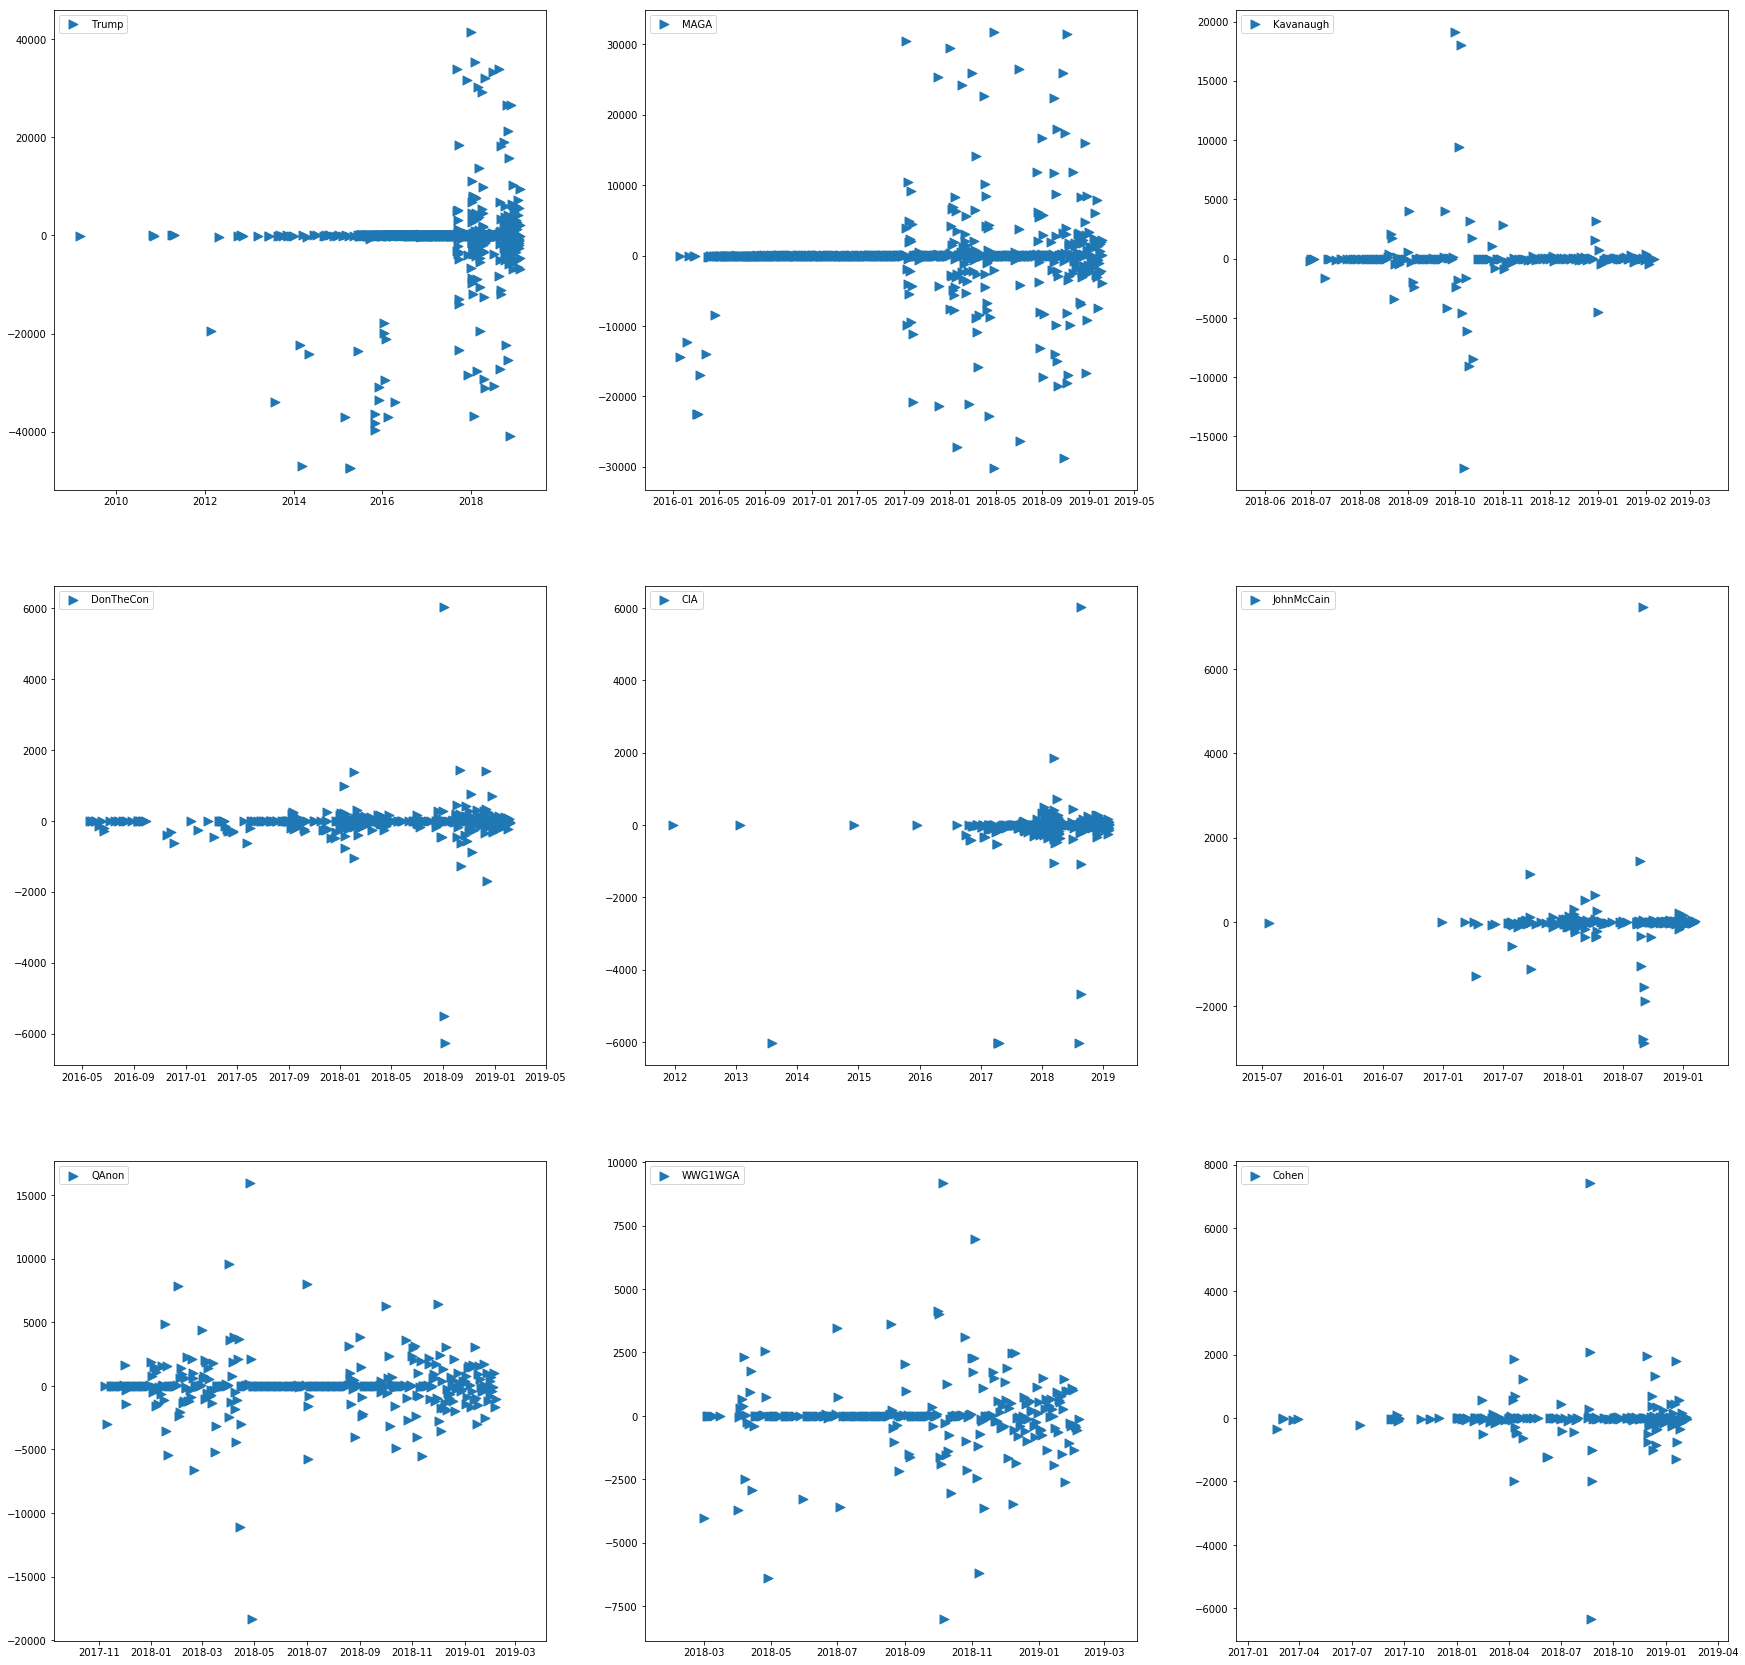

In [68]:
## get the plot with the tag

plotWithMultipleTag(df3['tag'])


The number of parts:  1277
The number of parts:  1015
The number of parts:  449
The number of parts:  300
The number of parts:  405
The number of parts:  300
The number of parts:  435
The number of parts:  199
The number of parts:  244


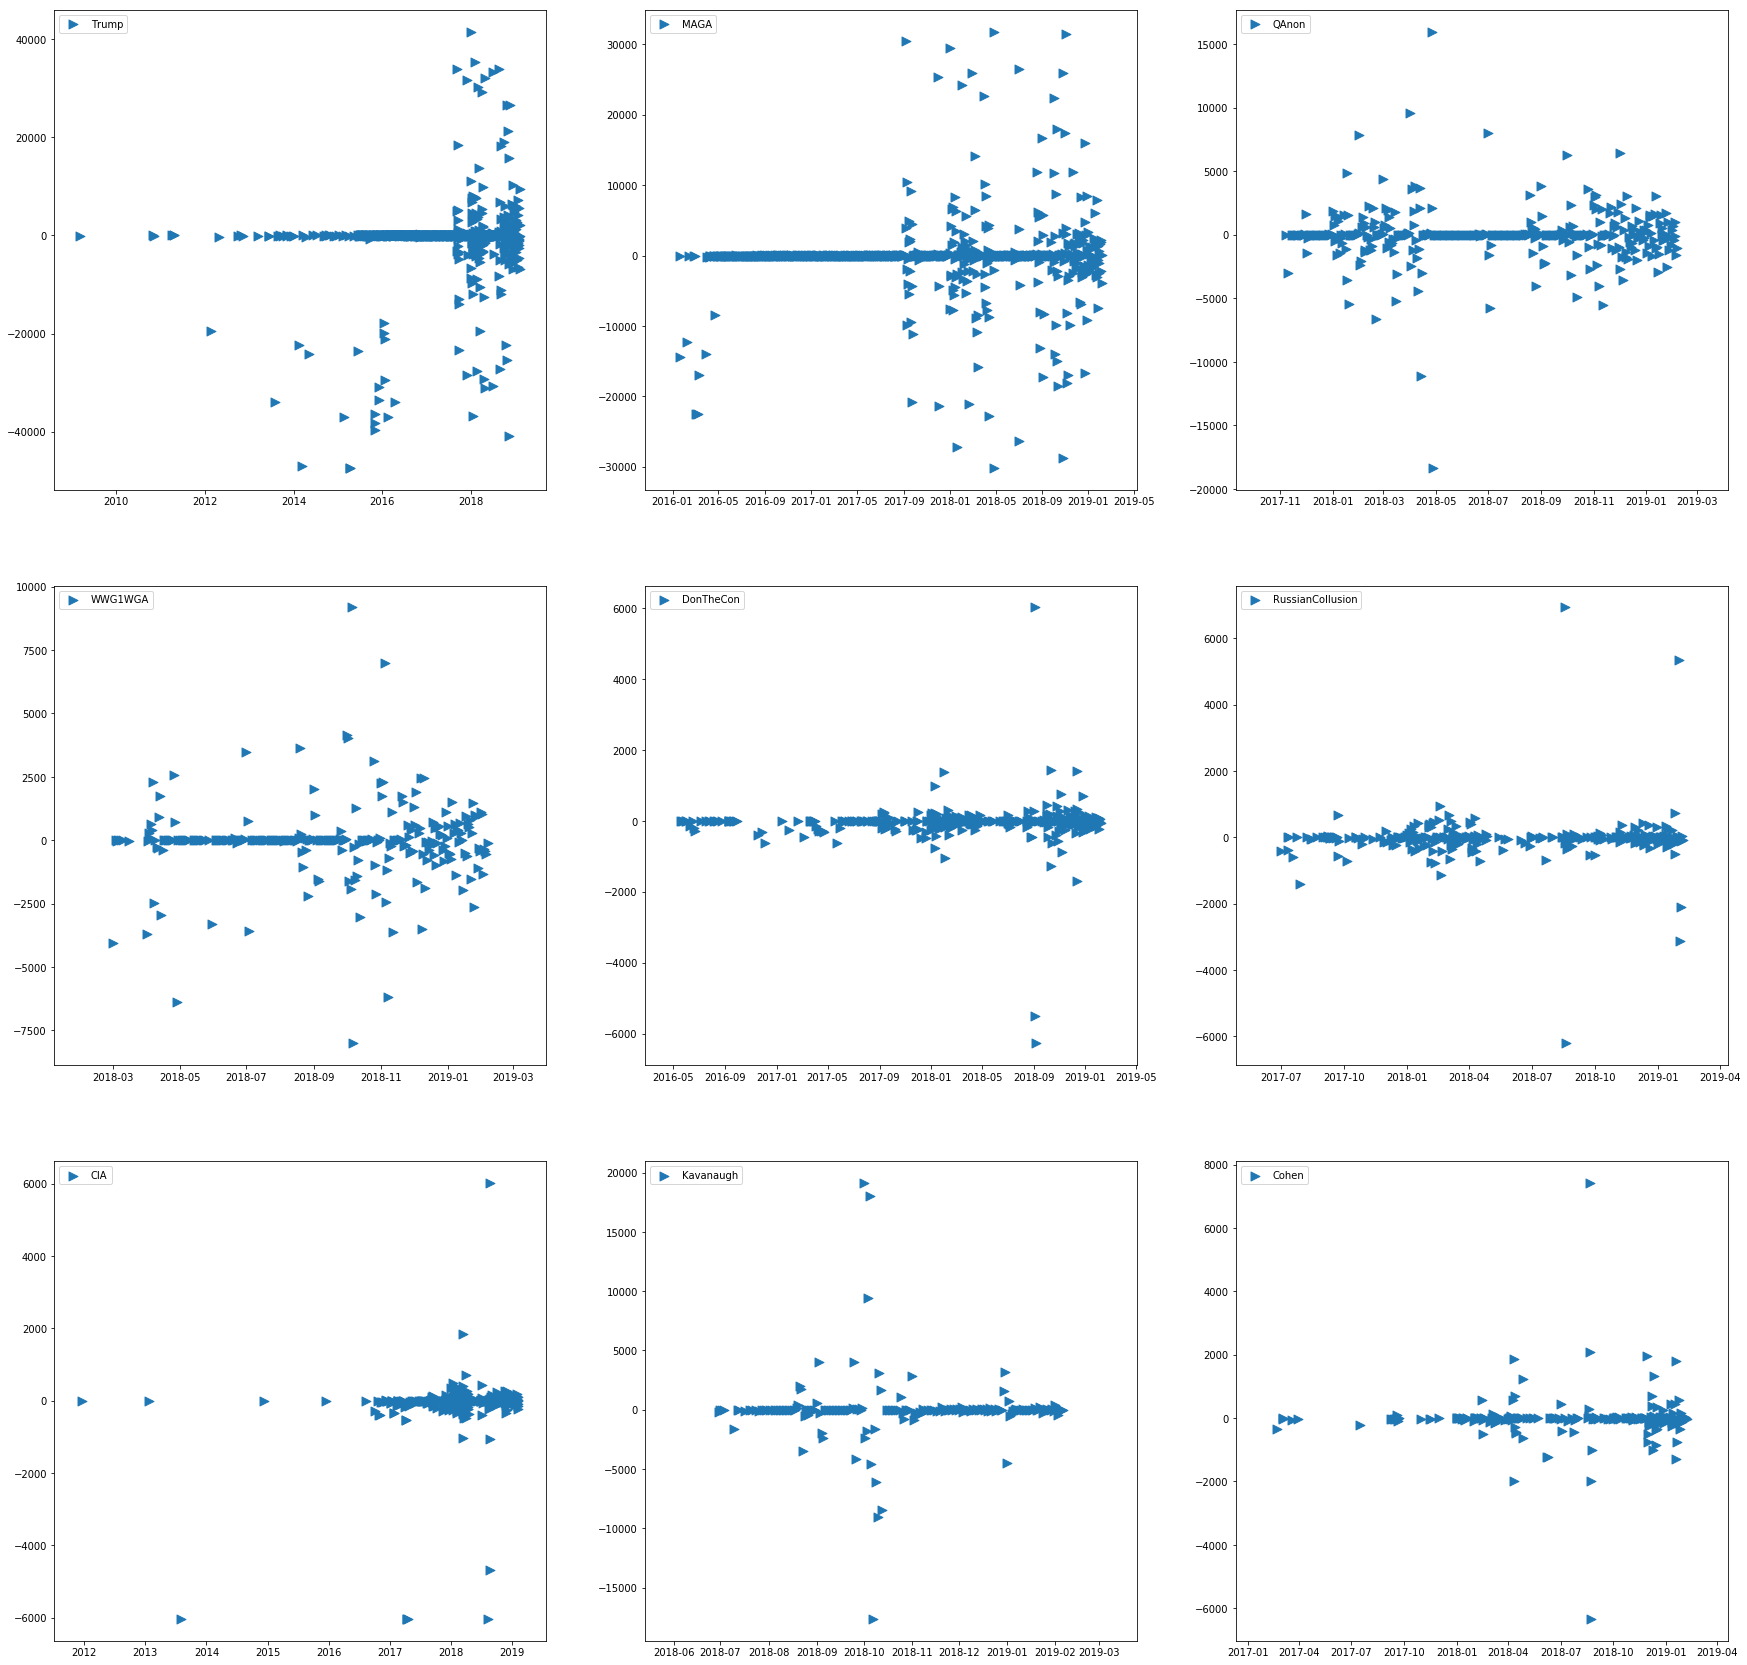

In [69]:
plotWithMultipleTag(df4['tag'])

The number of parts:  1277
The number of parts:  1015
The number of parts:  199
The number of parts:  300
The number of parts:  405
The number of parts:  300
The number of parts:  244
The number of parts:  279
The number of parts:  435


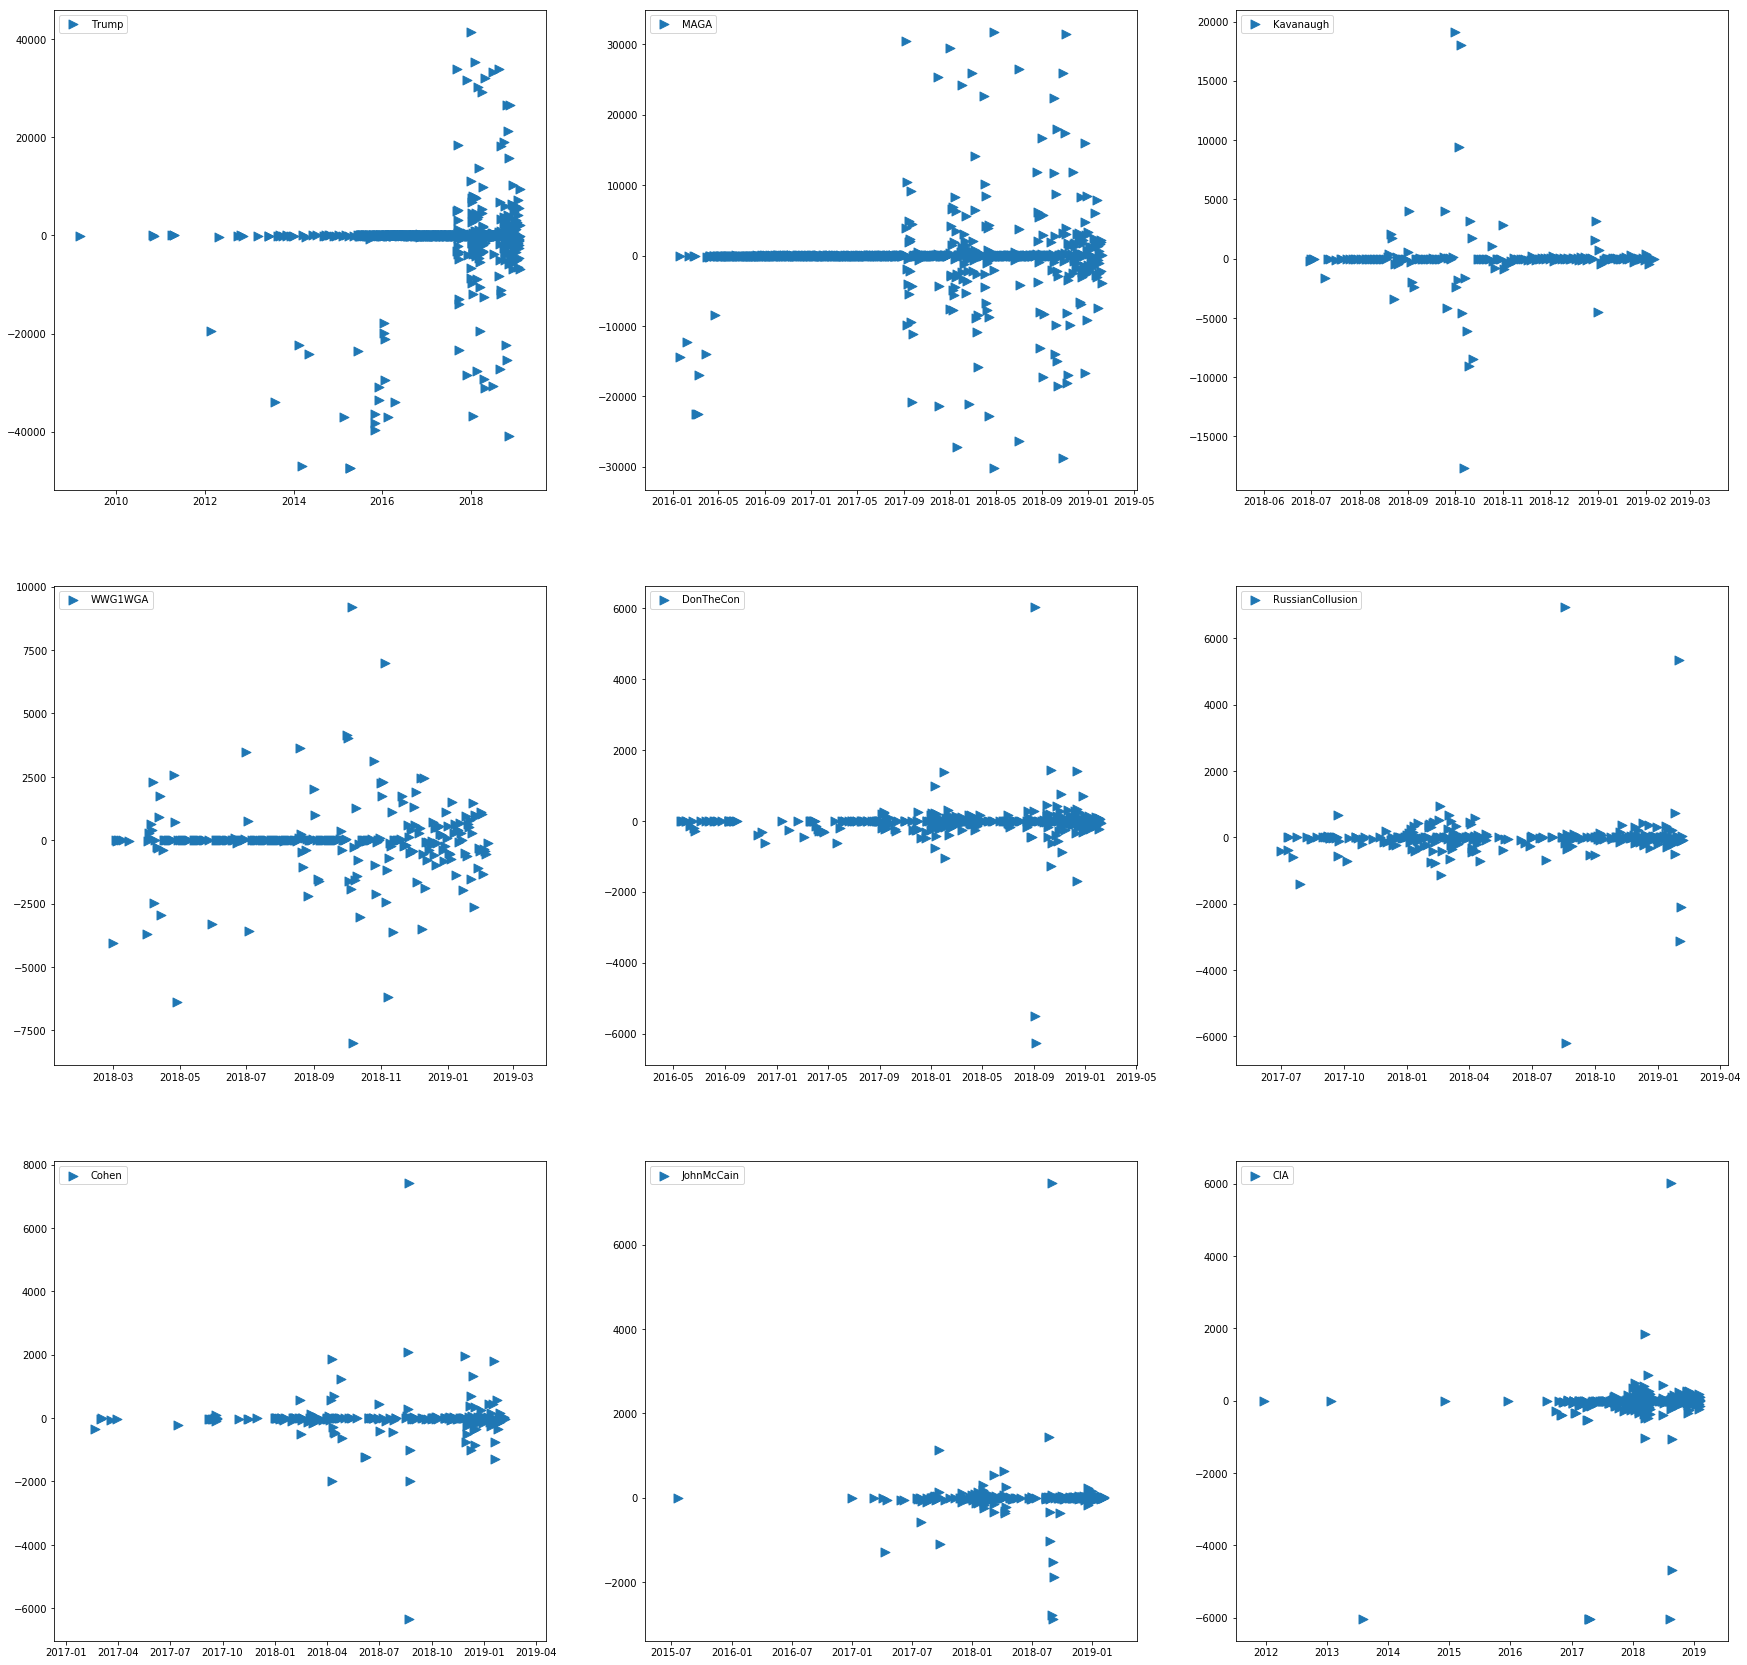

In [70]:
plotWithMultipleTag(df5['tag'])

In [32]:
## Method 4: Hierachical Clustering Method

In [33]:
data_train = getDataTrain("Trump")

data_train.head(5)

The number of parts:  1277


,index,velocity,date
0,12,106,570585600
1,17,1560,596419200
2,39,428,573436800
3,40,-2169,573523200
4,42,-30843,502848000


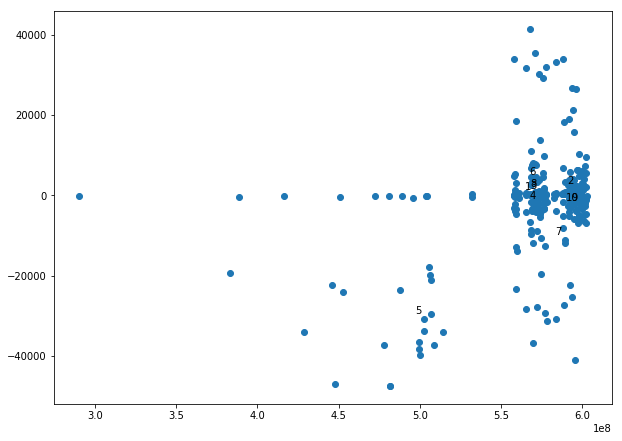

In [34]:
## plot the data
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(data_train['date'],data_train['velocity'], label='True Position')

for label, x, y in zip(labels, data_train['date'], data_train['velocity']):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

In [35]:
data_train = getDataTrain("Trump")
data_train.head(10)
data_train_noindex = data_train.drop(columns=["index"])
data_train_noindex.head(10)

The number of parts:  1277


,velocity,date
0,106,570585600
1,1560,596419200
2,428,573436800
3,-2169,573523200
4,-30843,502848000
5,3793,573264000
6,-11174,589420800
7,810,573782400
8,-2587,599270400
9,-2714,599356800


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

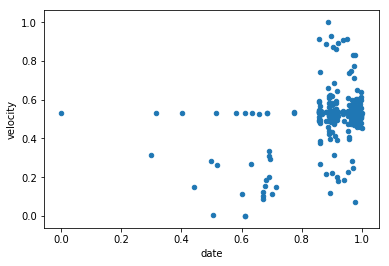

In [36]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train_noindex = scaler.fit_transform(data_train_noindex)
data_train_noindex = pd.DataFrame(data_train_noindex, columns = ["velocity", "date"])

data_train_noindex.plot.scatter(x = "date", y = "velocity")



from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 100,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(data_train_noindex)
clusters

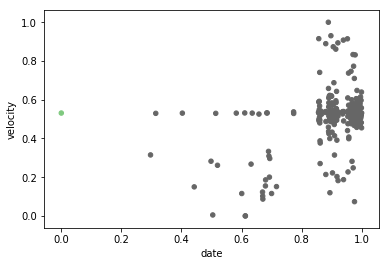

In [37]:
## plot the outliers
from matplotlib import cm
cmap = cm.get_cmap('Accent')
data_train_noindex.plot.scatter(
  x = "date",
  y = "velocity",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

In [38]:
## Get the optimized data without outliers
ix = [i for i in data_train.index if clusters[i] == 0]
data_train_optimized = data_train.loc[ix]
data_train_optimized.head(10)

,index,velocity,date
0,12,106,570585600
1,17,1560,596419200
2,39,428,573436800
3,40,-2169,573523200
4,42,-30843,502848000
5,43,3793,573264000
6,54,-11174,589420800
7,55,810,573782400
8,61,-2587,599270400
9,63,-2714,599356800


In [39]:
## Begin to train the models
X = data_train_optimized.values
X[:5]

array([[       12,       106, 570585600],
       [       17,      1560, 596419200],
       [       39,       428, 573436800],
       [       40,     -2169, 573523200],
       [       42,    -30843, 502848000]])

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_train_optimized)  

array([0, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 2, 1, 2, 1,
       0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 2, 2, 3, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 3, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0])

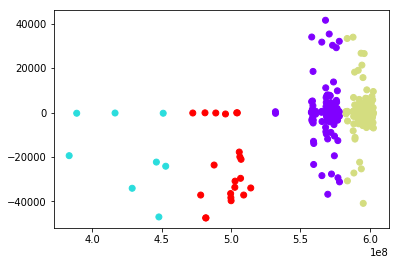

In [41]:
plt.scatter(X[:,2],X[:,1], c=cluster.labels_, cmap='rainbow')  
# plt.scatter(data_train['date'],data_train['velocity'], c=cluster.labels_, cmap='rainbow')  

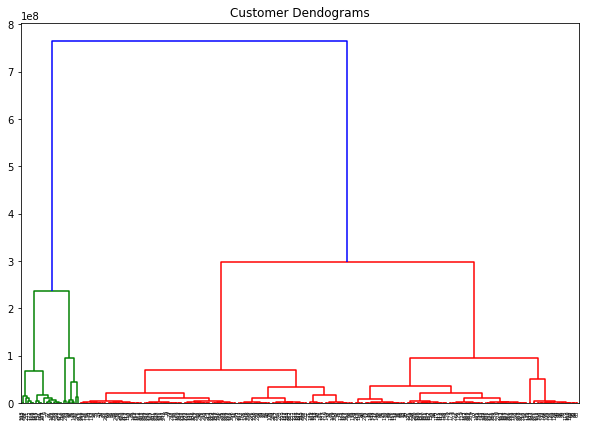

In [42]:
## plot the dendogram

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_train_optimized, method='ward'))  

In [43]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

data_train = data.iloc[:,[0]]
data_train = data_train.dropna()
data_train

,velocity
0,-14385
1,0
2,-6
3,-4
4,-22514
5,-22513
6,-22514
7,-17016
8,0
9,2


In [44]:
mms = MinMaxScaler()
mms.fit(data_train.iloc[:,[0]])
data_transformed = mms.transform(data_train.iloc[:,[0]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

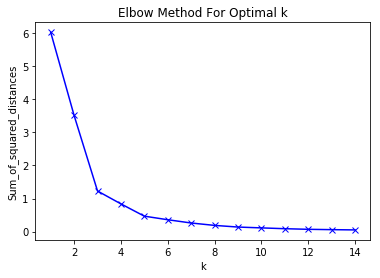

In [46]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:


km = KMeans(n_clusters=5).fit(data_train)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = km.labels_
cluster_map

,data_index,cluster
0,0,3
1,1,1
2,2,1
3,3,1
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,1


In [331]:
data_train['cluster'] = km.labels_
data_train['date'] = data['date']
data_train

,velocity,cluster,date
0,-14385,1,2016/1/20
1,0,0,2016/1/21
2,-6,0,2016/2/26
3,-4,0,2016/2/28
4,-22514,4,2016/3/4
5,-22513,4,2016/3/6
6,-22514,4,2016/3/8
7,-17016,4,2016/3/12
8,0,0,2016/5/1
9,2,0,2016/5/6


In [281]:
NClusterMeanVelocity = data_train.groupby('cluster').mean()
NClusterMeanVelocity

,velocity.3
cluster,
0,6.229630
1,9458.000000
2,-4701.333333
3,2951.000000
4,-1814.500000
